<a href="https://colab.research.google.com/github/Neerpatel25/Recognising-Handwritten-Digits/blob/main/MNIST_KNNipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Recognising Handwritten Digits on MNIST Dataset using KNN**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/

/content/drive


In [3]:
cd MyDrive/mycsv_f

/content/drive/MyDrive/mycsv_f


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**1)DATA PREPARATION**

In [6]:
df=pd.read_csv('mnist_train.csv')

In [7]:
print(df.shape)

(42000, 785)


In [9]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [10]:
df.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data=df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [13]:
X=data[:,1:]
Y=data[:,0]
print(X.shape,Y.shape)

(42000, 784) (42000,)


In [16]:
split=int(0.8*X.shape[0])
print(split)
X_train=X[:split,:]
Y_train=Y[:split]
X_test=X[split:,:]
Y_test=Y[split:]
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_train.shape)

33600
(33600, 784) (33600,)
(8400, 784) (33600,)


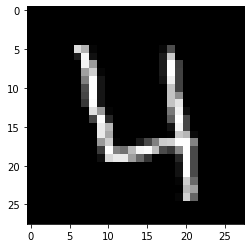

4


In [18]:
#visulise some samples
def drawimg(sample):
  img=sample.reshape((28,28))
  plt.imshow(img,cmap='gray')
  plt.show()
drawimg(X_train[3])
print(Y_train[3])

**2)KNN**

In [17]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))


def knn(X,Y,queryPoint,k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    
    vals = sorted(vals)

    vals = vals[:k]
    
    vals = np.array(vals)

    
    new_vals = np.unique(vals[:,1],return_counts=True)

    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

**3)MAKE PREDICTION**

Predication is: 0


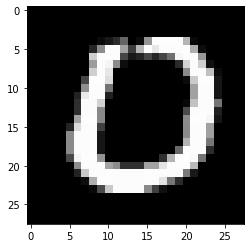

0


In [20]:
pred=knn(X_train,Y_train,X_test[0])
print("Predication is: ",end="")
print(int(pred))


drawimg(X_test[0])
print(Y_test[0])